<a href="https://colab.research.google.com/github/sumairrathore/Module1Challenge/blob/main/Credit_Card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use your comments and tags, where all you all have ediited.ommited the collab worksheet


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import missingno as msn
from collections import Counter
from scipy.stats import linregress
path = '/content/drive/MyDrive/Dataset/BankChurners.csv'
df = pd.read_csv(path)
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df.drop([df.columns[21],df.columns[22]],axis=1,inplace=True)
df.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105


Text(0.5, 1.0, 'Credit Card Customer Age Distribution')

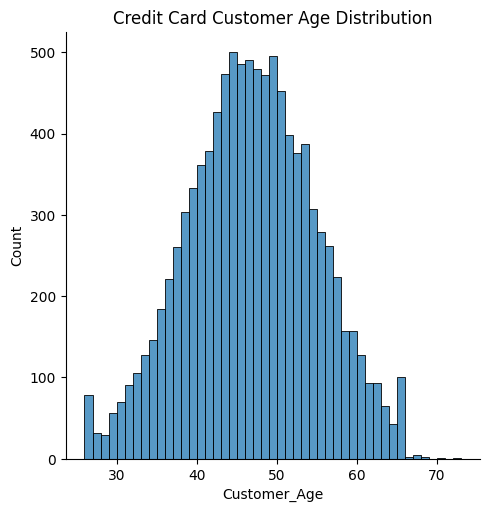

In [16]:
sns.displot(df['Customer_Age'])
plt.title('Credit Card Customer Age Distribution')

In [8]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

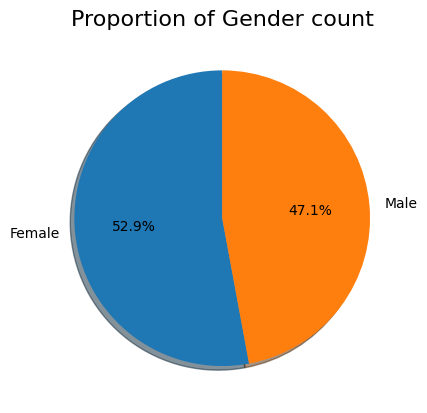

In [10]:
plt.pie(df['Gender'].value_counts(), labels = ['Female', 'Male'], autopct='%1.1f%%', shadow = True, startangle = 90)
plt.title('Proportion of Gender count', fontsize = 16)
plt.show()


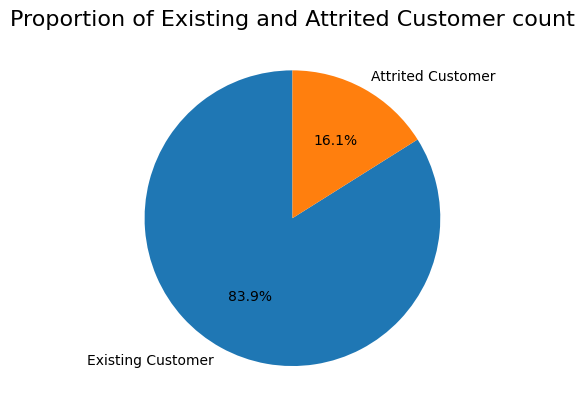

In [11]:
plt.pie(df['Attrition_Flag'].value_counts(), labels = ['Existing Customer', 'Attrited Customer'], 
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Existing and Attrited Customer count', fontsize = 16)
plt.show()

Text(0.5, 1.0, 'Existing and Attrted Customers by Gender')

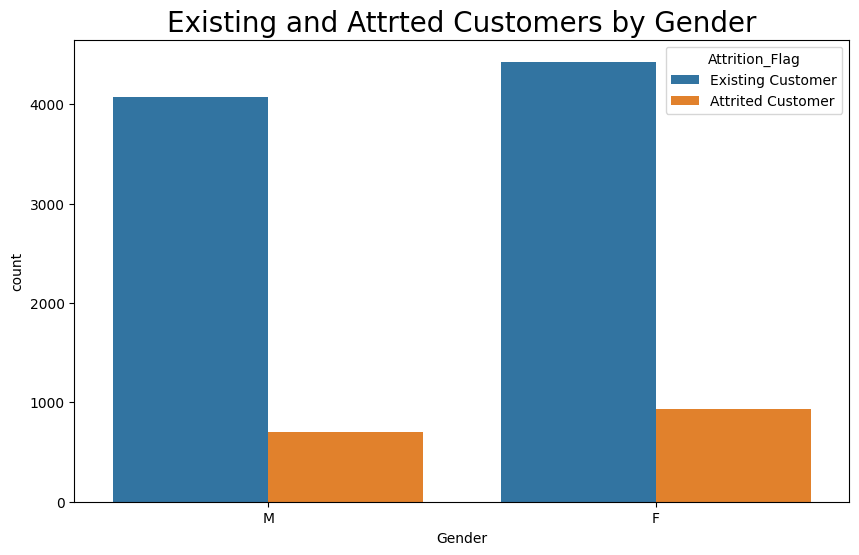

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Existing and Attrted Customers by Gender', fontsize=20)

Text(0.5, 1.0, 'Existing Customer vs Gender')

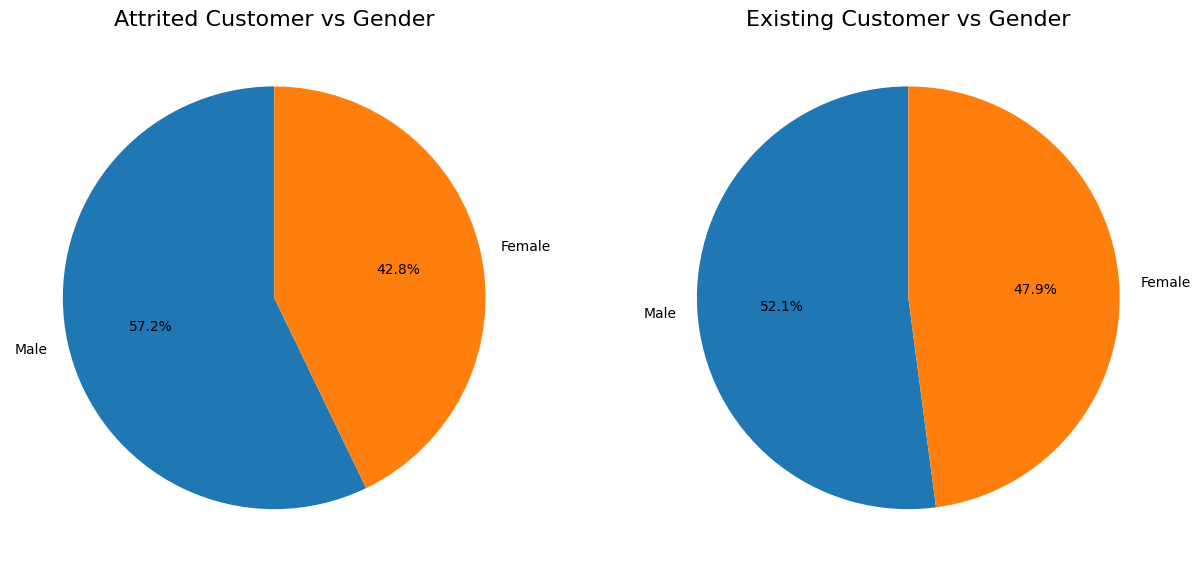

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,15))

attrited_gender = df.loc[df["Attrition_Flag"] == "Attrited Customer", ["Gender"]].value_counts().tolist()
ax1.pie(x=attrited_gender, labels=["Male", "Female"], autopct='%1.1f%%', startangle=90)
ax1.set_title('Attrited Customer vs Gender', fontsize=16)

existing_gender=df.loc[df["Attrition_Flag"] == "Existing Customer", ["Gender"]].value_counts().tolist()
ax2.pie(x=existing_gender,labels=["Male","Female"],autopct='%1.1f%%', startangle=90)
ax2.set_title('Existing Customer vs Gender', fontsize=16)

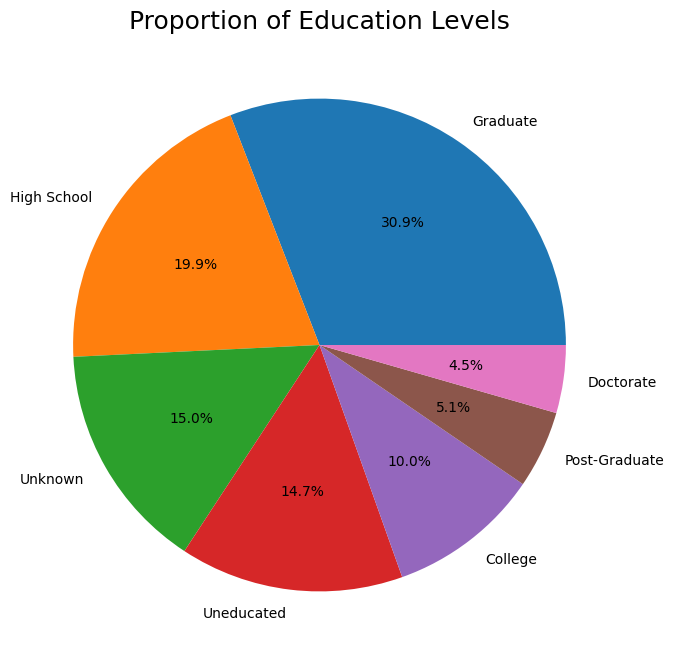

In [14]:
edu = df['Education_Level'].value_counts().to_frame('Counts') 
plt.figure(figsize = (8,8))
plt.pie(edu['Counts'], labels = edu.index, autopct = '%1.1f%%')
plt.title('Education Levels Proportion', fontsize = 18)
plt.show()